<a href="https://colab.research.google.com/github/pratikktiwari/ML-Learnings/blob/main/01_Neural_Network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow
There are many definitions for a regression problem but in our case, we're going to to simplify it: predicting numerical variables based on some other combination of variables, even shorter... predicting number.

In [1]:
# Import TensforFlow
import tensorflow as tf
print(tf.__version__)

2.8.2


## Creating data to view and fit

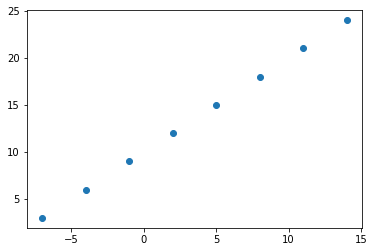

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,y)

In [3]:
# Relationship

y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [8]:
# Scalar has no shape
X[0].ndim

0

In [9]:
X[0], y[0]

(-7.0, 3.0)

In [10]:
# Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

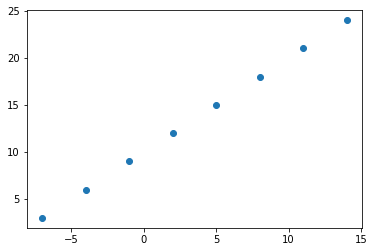

In [12]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow
1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the ***loss function*** (in other words, the function which tells out model how wrong it is) and the ***optimizer*** (tells our model how to improve the patterns it is learning) and ***evaluation metrics*** (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

![image.png](https://raw.githubusercontent.com/pratikktiwari/ML-Learnings/main/resources/regression-steps.png?token=GHSAT0AAAAAABQ3M2PPCKOGBQU5BDUWWXZUYVURCGA)

* **Loss**: How wrong the model's predictions are compared to the truth labels (this should be minimized)
* **Optimizer**: How the model should update its internal patterns to better its predictions
* **Metrics**: Human interpretable values for how well the model is doing
* **Epochs**: How many times the model will go through all of the training examples

In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API

model = tf.keras.Sequential(
    [tf.keras.layers.Dense(1, input_shape=[1])] # take 1 neuron, shape of a single feature
)

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # Mean absolute error => comparision of predicted vs observed => loss = mean(abs(y_true - y_pred), axis=-1)
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochasitc gradient descent => tells neural network how it should improve
              metrics=["mae"]) 

# Fit the model
model.fit(X, y, epochs=5) # Look at X and y and figure out pattern. Try 5 times.



Epoch 1/5
1/1 [==============================] - 1s 542ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 17ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 24ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 10.9748 - mae: 10.9748


In [14]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# Try and make a prediction using our trained model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [16]:
y_pred + 11 # loss = 10.9 ~ 11

array([[23.71602]], dtype=float32)

## Improving our model
We can improve our mode, by altering the steps we took to create a model.
1. **Creating a model** - we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer.
3. **Compiling a model** - we might change the optimization function or perhaps the **learning rate** of the optimization function.
4. **Fitting a model** - we might fit a model for more **epochs** (leave it training for longer) or on more data (give more examples to the model to learn from)

In [17]:
# Let's rebuild our model with higher epoch for fitting

# Create the model
model = tf.keras.Sequential(
  [tf.keras.layers.Dense(1, input_shape=[1])]
)

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 550ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 28ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 35ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================

In [18]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
# Check if model prediction has improved
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [20]:
# Alter layers and check accuracy
model = tf.keras.Sequential([
  tf.keras.layers.Dense(500, input_shape=[1]), # 500 neurons in the first layer
  tf.keras.layers.Dense(20, input_shape=[1]), # 20 neurons in the second layer
  tf.keras.layers.Dense(1, input_shape=[1]), # 1 neuron in the last layer
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 788ms/step - loss: 13.2105 - mae: 13.2105
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 12.3126 - mae: 12.3126
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 11.3932 - mae: 11.3932
Epoch 4/100
1/1 [==============================] - 0s 22ms/step - loss: 10.4251 - mae: 10.4251
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 9.3787 - mae: 9.3787
Epoch 6/100
1/1 [==============================] - 0s 23ms/step - loss: 8.2201 - mae: 8.2201
Epoch 7/100
1/1 [==============================] - 0s 22ms/step - loss: 7.1861 - mae: 7.1861
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 7.1421 - mae: 7.1421
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 7.0978 - mae: 7.0978
Epoch 10/100
1/1 [==============================] - 0s 24ms/step - loss: 7.0531 - mae: 7.0531
Epoch 11/100
1/1 [==============================] - 0s 22ms/

In [21]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [22]:
model.predict([17.0])

# Previous output [29.739855]
# Current output [31.389563]

# Current model accuracy is lower than previous as the actual value if 17 + 10 = 27
# and 29 is closer to 27 than 31

array([[32.760986]], dtype=float32)

In [23]:
# Adding activation function to the layers
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu", input_shape=[1]), # ReLU - rectified linear unit activation function
  tf.keras.layers.Dense(100, activation="relu", input_shape=[1]),
  tf.keras.layers.Dense(100, activation="relu", input_shape=[1]),
  tf.keras.layers.Dense(1, activation="relu", input_shape=[1])
])
model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=tf.keras.losses.mae,
              metrics=["mae"]
)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 933ms/step - loss: 13.0174 - mae: 13.0174
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 12.4341 - mae: 12.4341
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 11.7819 - mae: 11.7819
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 11.1084 - mae: 11.1084
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 10.3339 - mae: 10.3339
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 9.3706 - mae: 9.3706
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 8.1696 - mae: 8.1696
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 6.6309 - mae: 6.6309
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 4.7516 - mae: 4.7516
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 4.1795 - mae: 4.1795
Epoch 11/100
1/1 [==============================] - 0s 8ms/

In [24]:
model.predict([17.0])

array([[30.335194]], dtype=float32)

In [25]:
# Previous highest accuracy result = [29.739855]
# Current accuracy result = [29.215181]

# Current is better but just by a small margin

In [26]:
# change the optimizer during compilation

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) #, activation="relu"
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(lr=0.0001),
    metrics=["mae"]
)

model.fit(X, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 875ms/step - loss: 19.5190 - mae: 19.5190
Epoch 2/100
1/1 [==============================] - 0s 23ms/step - loss: 19.5184 - mae: 19.5184
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 19.5178 - mae: 19.5178
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 19.5172 - mae: 19.5172
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 19.5166 - mae: 19.5166
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 19.5160 - mae: 19.5160
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 19.5154 - mae: 19.5154
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 19.5148 - mae: 19.5148
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 19.5142 - mae: 19.5142
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 19.5136 - mae: 19.5136
Epoch 11/100
1/1 [==============================] - 0s 23ms/

In [27]:
model.predict([17.0])

array([[-21.738567]], dtype=float32)

In [28]:
# Previous result = 29.215181
# Current result = 21.924559

# previous_difference = 2.215181
# current_difference = 6.924559

# Previous model was better

In [29]:
# Combining all above model optimization techniques

model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, input_shape=[1], activation="relu"),
  tf.keras.layers.Dense(100, input_shape=[1], activation="relu"),
  tf.keras.layers.Dense(100, input_shape=[1], activation="relu"),
  tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(lr=0.0001), # lr=learning rate, by how much should model improve
    metrics=["mae"]
)

model.fit(X, y, epochs=100)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 1s 991ms/step - loss: 13.5566 - mae: 13.5566
Epoch 2/100
1/1 [==============================] - 0s 27ms/step - loss: 13.5251 - mae: 13.5251
Epoch 3/100
1/1 [==============================] - 0s 23ms/step - loss: 13.4937 - mae: 13.4937
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 13.4625 - mae: 13.4625
Epoch 5/100
1/1 [==============================] - 0s 43ms/step - loss: 13.4317 - mae: 13.4317
Epoch 6/100
1/1 [==============================] - 0s 30ms/step - loss: 13.4009 - mae: 13.4009
Epoch 7/100
1/1 [==============================] - 0s 28ms/step - loss: 13.3702 - mae: 13.3702
Epoch 8/100
1/1 [==============================] - 0s 23ms/step - loss: 13.3400 - mae: 13.3400
Epoch 9/100
1/1 [==============================] - 0s 22ms/step - loss: 13.3102 - mae: 13.3102
Epoch 10/100
1/1 [==============================] - 0s 22ms/step - loss: 13.2813 - mae: 13.2813
Epoch 11/100
1/1 [==============================

In [30]:
model.predict([17.0])

array([[8.49365]], dtype=float32)

In [31]:
# Accuracy is lower than all above models

In [32]:
# Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None, input_shape=[1]),
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# Fit the model
model.fit(X, y, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.2573 - mae: 13.2573
Epoch 2/100
1/1 [==============================] - 0s 24ms/step - loss: 12.5838 - mae: 12.5838
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 11.9128 - mae: 11.9128
Epoch 4/100
1/1 [==============================] - 0s 29ms/step - loss: 11.2431 - mae: 11.2431
Epoch 5/100
1/1 [==============================] - 0s 28ms/step - loss: 10.5732 - mae: 10.5732
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 9.9004 - mae: 9.9004
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 9.2220 - mae: 9.2220
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 8.5346 - mae: 8.5346
Epoch 9/100
1/1 [==============================] - 0s 21ms/step - loss: 7.8344 - mae: 7.8344
Epoch 10/100
1/1 [==============================] - 0s 28ms/step - loss: 7.1177 - mae: 7.1177
Epoch 11/100
1/1 [==============================] - 0s 17ms/s

In [33]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [34]:
model.predict([17.0])

array([[27.489813]], dtype=float32)

**Common ways to improve a deep model**
* Adding layers
* Increase the number of hidden units
* Change the activation functions
* Change the optimization function
* Change the learning rate ***lr or learning_rate***
* Fitting on more data
* Fit for longer ***epochs***

## Evaluating a model

In practise, a typical workflow to go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation:
> Visualize, Visualize, Visualize

It's a good idea to visualize: 
* The data - what data are we working with? What does it look like?
* The midel itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how does the predictions of the model line up with the actual results (ground truth)?

In [35]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [36]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

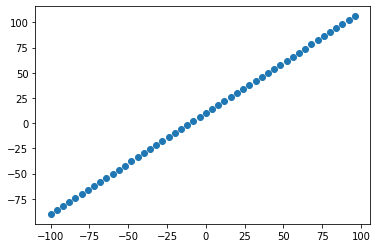

In [37]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70% - 80% of total data
* **Validation set** - the model gets tuned on this data which is typically 10% - 15% of data available
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10% - 15% of the total data available

In [38]:
# Check the length of how many sampes we have
len(X)

50

In [39]:
# Split the data into train and test sets
X_train = X[:40] # first 40 training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualize the data

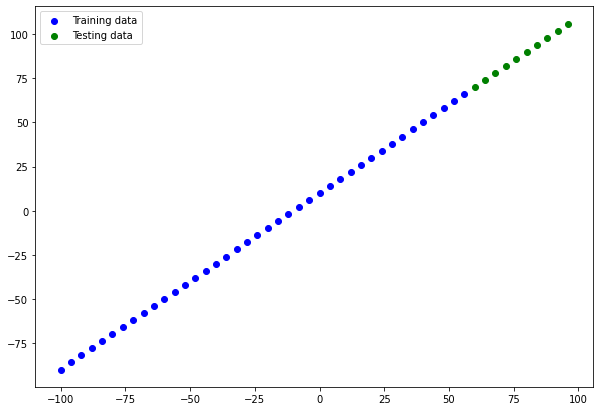

In [40]:
plt.figure(figsize=(10, 7))

# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")

# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")

# Show a legend
plt.legend()

In [41]:
# Building neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

## Visualizing the model

In [42]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when parameters are imported from other models during **transfer learning**

***MIT introduction to deep learning***

In [43]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="top_layer"),
  tf.keras.layers.Dense(1, name="output_layer"),
], name="model_1")

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [44]:
# Fit model
model_1.fit(X_train, y_train, epochs=100, verbose=0)

In [45]:
# Get a summary of model
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 top_layer (Dense)           (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


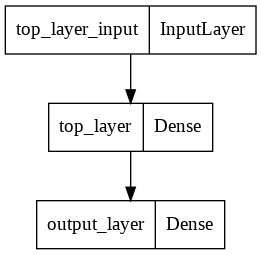

In [46]:
from tensorflow.keras.utils import plot_model

plot_model(model=model_1)

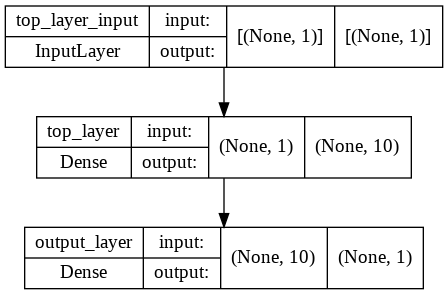

In [47]:
plot_model(model=model_1, show_shapes=True)

### Visualizing our model's prediction

To visualize predictions, it's a good idea to plot them against the ground truth labels.

This can often be seen in form of `y_test` or `y_true` versus `y_pred` (ground truth versus the model's predictions)

In [48]:
# Make some predictions
y_pred_1 = model_1.predict(X_test)
y_pred_1

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [49]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [50]:
# Create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  plt.figure(figsize=(10,7))
  
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")

  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")

  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")

  # Show legend
  plt.legend()

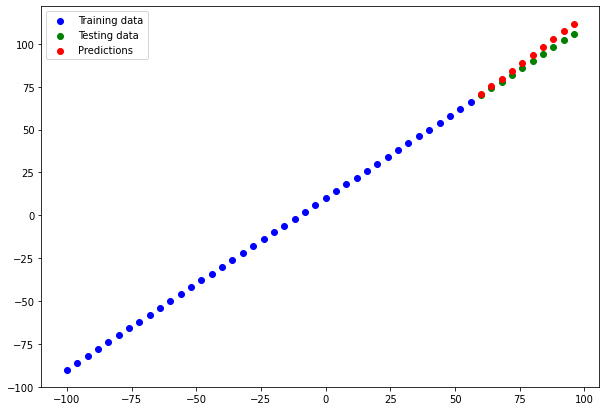

In [51]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred_1)

In [86]:
def mae(y_true=y_test, y_pred=y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred)).numpy()

def mse(y_true=y_test, y_pred=y_pred):
  return tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred)).numpy()

In [87]:
mae_1 = mae(y_pred=y_pred_1)
mse_1 = mse(y_pred=y_pred_1)

mae_1, mse_1

(3.1969407, 13.070143)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


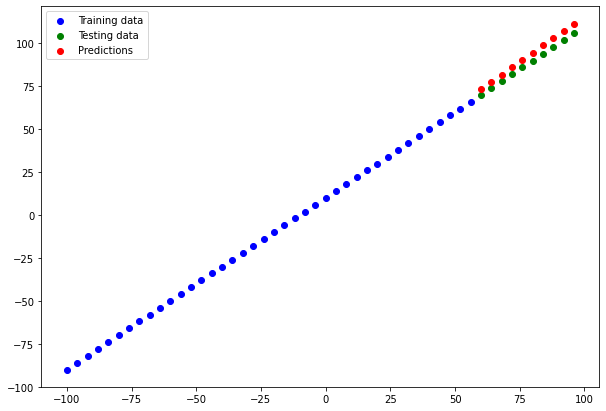

In [88]:
# Change learning rate and optimizer and test accuracy
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1]),
  tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.021),
              metrics=["mae"])
model_2.fit(X_train, y_train, epochs=50, verbose=0)

y_pred_2 = model_2.predict(X_test)

plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred_2)

In [89]:
y_test, y_pred

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 array([[12.716021]], dtype=float32))

In [90]:
mae_2 = mae(y_pred=y_pred_2)
mse_2 = mse(y_pred=y_pred_2)
mae_2, mse_2

(4.4254446, 20.069864)

### Evaluting our model's prediction with regression evaluation metrics

Depending on the problem there will be different evalution metrics to evalute model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on an average, how wrong is each of the model's predictions"
* MSE - mean square error, "square the errors and average them"


**MAE**
> As a great starter metric for any regression problem

> ( ∑ | y_test - y_pred | ) / n

**MSE**
> When larger errors are more significant than smaller errors

> [ ∑ square( y_test - y_pred ) ] / n

**Huber**
> Combination of MSE and MAE. Less sensitive outliers than MSE


In [91]:
# Evaluate the model on the test set
model.evaluate(y_test, y_pred_1)

# output: loss, mae

1/1 [==============================] - 0s 19ms/step - loss: 65.2100 - mae: 65.2100


[65.21000671386719, 65.21000671386719]

In [92]:
# Calculate the mean absolute error
# tf.keras.losses.MAE(y_test, y_pred)

mae_test = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.constant(y_pred_2))
mae_test

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([15.332782, 12.654063, 10.87236 , 10.      , 10.060835, 11.018686,
       12.873548, 15.625427, 19.274338, 23.516861], dtype=float32)>

In [93]:
tf.constant(y_pred_2)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 73.33402 ],
       [ 77.57656 ],
       [ 81.8191  ],
       [ 86.061646],
       [ 90.30418 ],
       [ 94.546715],
       [ 98.789246],
       [103.031784],
       [107.27434 ],
       [111.51686 ]], dtype=float32)>

In [94]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [95]:
tf.squeeze(y_pred_2)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 73.33402 ,  77.57656 ,  81.8191  ,  86.061646,  90.30418 ,
        94.546715,  98.789246, 103.031784, 107.27434 , 111.51686 ],
      dtype=float32)>

In [96]:
# Calaculate the MAE
mae_test = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred_2))
mae_test

<tf.Tensor: shape=(), dtype=float32, numpy=4.4254446>

In [97]:
# Calculate the MSE
mse_test = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred_2))
mse_test

<tf.Tensor: shape=(), dtype=float32, numpy=20.069864>

In [98]:
# Make some functions to reuse MAE and MSE
# def mae(y_true, y_pred):
#   return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=y_pred)
  
# def mse(y_true, y_pred):
#   return tf.metric.mean_squared_error(y_true=y_true, y_pred=y_pred)

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it...
```

1. Get more data - get more examples for model to train (more opportunities to learn patterns or relationships between features and labels).

2. Make the model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer

3. Train for longer - give the model more of a chance to find patterns in the data


Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs

2. `model_2` - 2 layers, trained for 100 epochs

3. `model_3` - 2 layers, trained for 500 epochs

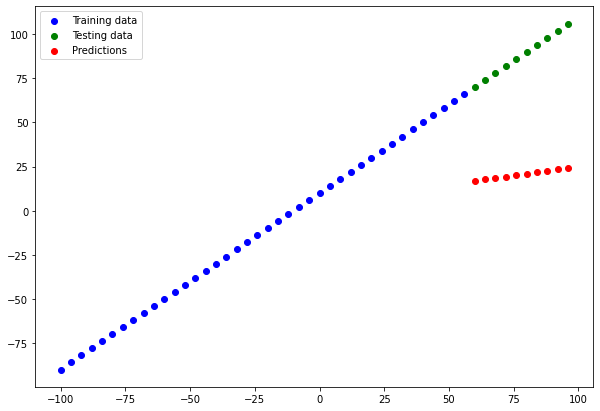

In [99]:
# Create the model

model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, input_shape=[1]),
  tf.keras.layers.Dense(1)
])
model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)
model_3.fit(X_train, y_train, epochs=500, verbose=0)

y_pred_3 = model_3.predict(X_test)

plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred_3)



In [100]:
X_test, y_test

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [101]:
y_pred

array([[12.716021]], dtype=float32)

In [102]:
mae_3 = mae(y_pred=y_pred_3)
mse_3 = mse(y_pred=y_pred_3)

mae_3, mse_3

(67.43527, 4631.048)

## Comapring the results of experiments

In [103]:
import pandas as pd

model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,3.196941,13.070143
1,model_2,4.425445,20.069864
2,model_3,67.435272,4631.047852


Looks like `model_2` performed the best.

In [104]:
model_2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 10)                20        
                                                                 
 dense_26 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* **Experiment Experiment Experiment**
* **Visualize Visualize Visualize**

## Tracking experiments

One really good habit in ML modelling is to track results of the experiments.

It can be tedious if a lot of experiments are run.

**Resource:**

* ***TensorBoard*** - a component of the TensorFlow lobrary to help track modelling experiments
* ***Weights & Biases*** - a tool for tracking all of ML experiments (plugs straight into TensorFlow)

## Saving our models

There are two main formats to save ML models:

* **SavedModel** format
  * Can be loaded back with `tf.keras.models.load_model`
  * Can be saved by `model.save('/path/model_1')`

* **HDF5** format
  * Save using `model.save('/path/model_1.h5')`

In [105]:
# Save model using the SaveModel format
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [106]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Loading a saved model

In [107]:
# Load the SavedModel format
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 10)                20        
                                                                 
 dense_26 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [108]:
model_2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 10)                20        
                                                                 
 dense_26 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [109]:
# Compare model_2 predictions with SavedModel predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)

model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [110]:
# Load the model of HDF5 format

loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 10)                20        
                                                                 
 dense_26 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [111]:
model_2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 10)                20        
                                                                 
 dense_26 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [112]:
# Check if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)

model_2_preds == loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab


In [113]:
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## A larger example

In [136]:
# import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [116]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [120]:
# one hot encoding
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [121]:
# Create X & y values (features and labels)
# Create training and test sets
# Build a neural network

In [287]:
X_insurance = insurance_one_hot.drop("charges", axis=1)
X_insurance.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [288]:
y_insurance = insurance_one_hot[["charges"]]
y_insurance.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [148]:
X_train_insurance = X_insurance[0 : int(len(X_insurance) * 0.8)]

X_test_insurance = X_insurance[int(len(X_insurance) * 0.8): ]

X_train_insurance.head()

,age,bmi,children,sex_female,smoker_yes
0,19,27.900,0,1,1
1,18,33.770,1,0,0
2,28,33.000,3,0,0
3,33,22.705,0,0,0
4,32,28.880,0,0,0


In [154]:
X_train_insurance.iloc[0]

age           19.0
bmi           27.9
children       0.0
sex_female     1.0
smoker_yes     1.0
Name: 0, dtype: float64

In [149]:
X_test_insurance.head()

,age,bmi,children,sex_female,smoker_yes
1070,37,37.070,1,0,1
1071,63,31.445,0,0,0
1072,21,31.255,0,0,0
1073,54,28.880,2,1,0
1074,60,18.335,0,1,0


In [184]:
y_train_insurance = y_insurance[0 : int(len(X_insurance) * 0.8)]

y_test_insurance = y_insurance[int(len(X_insurance) * 0.8): ]

y_train_insurance.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [185]:
y_test_insurance.head()

,charges
1070,39871.70430
1071,13974.45555
1072,1909.52745
1073,12096.65120
1074,13204.28565


In [294]:
from sklearn.model_selection import train_test_split
X_train_insurance, X_test_insurance, y_train_insurance, y_test_insurance = train_test_split(
    X_insurance, y_insurance, test_size=0.8, random_state=42
)
len(X_train_insurance), len(X_test_insurance) 

(267, 1071)

In [351]:
tf.random.set_seed(42)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, input_shape=[11]),
  tf.keras.layers.Dense(50),
  tf.keras.layers.Dense(1)
])
insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(lr=0.02),
    metrics=["mae"]
)
history = insurance_model.fit(X_train_insurance, y_train_insurance, epochs=100, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Text(0.5, 0, 'epochs')

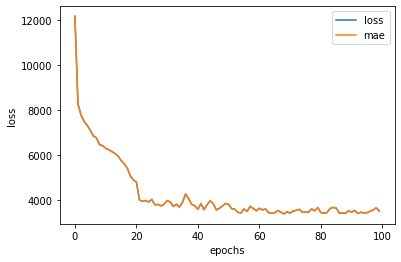

In [362]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [352]:
mae(insurance_model), mse(insurance_model)

(75.28398, 5799.678)

In [353]:
insurance_model.evaluate(X_test_insurance, y_test_insurance)

34/34 [==============================] - 1s 6ms/step - loss: 3469.3499 - mae: 3469.3499


[3469.349853515625, 3469.349853515625]

In [354]:
y_pred_insurance = insurance_model.predict(X_test_insurance)

In [355]:
tf.squeeze(y_pred_insurance).shape, X_test_insurance.shape

(TensorShape([1071]), (1071, 11))

In [356]:
X_test_insurance["age"].size, y_test_insurance.size

(1071, 1071)

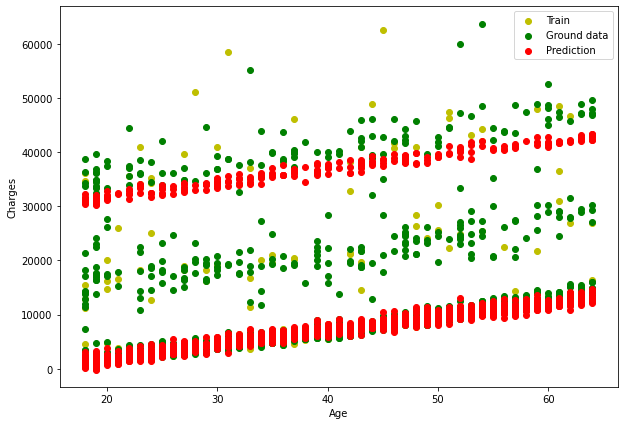

In [363]:
# tf.squeeze(y_test_insurance)
plt.figure(figsize=(10,7))
plt.scatter(X_train_insurance["age"], y_train_insurance, c="y", label="Train")
plt.scatter(X_test_insurance["age"], y_test_insurance, c="g", label="Ground data")
plt.scatter(X_test_insurance["age"], y_pred_insurance, c="r", label="Prediction")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend()

In [358]:
y_pred_insurance[0:10]

array([[ 9159.888 ],
       [ 5919.3604],
       [42761.26  ],
       [ 8996.533 ],
       [31009.072 ],
       [ 5393.063 ],
       [ 1187.5166],
       [12865.41  ],
       [ 3491.2205],
       [ 9920.977 ]], dtype=float32)

In [308]:
y_test_insurance[0:10]

,charges
764,9095.06825
887,5272.17580
890,29330.98315
1293,9301.89355
259,33750.29180
1312,4536.25900
899,2117.33885
752,14210.53595
1286,3732.62510
707,10264.44210


> 🤔 How long should a model be tranied?

It depends on the problem being worked on. However there is a solution in TensoryFlow- ***EarlyStopping Callback***.
Example: This can be used to tell tensorflow: stop training if the losses is non-decreasing continuously for 10 (n) epochs

## Preprocessing data (normalization and standardization)